# Analyze attacks and profit over time

Plot for the publication.

In [1]:
import collections
import datetime as dt
import json
import os
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

In [2]:
data_directory = os.path.join("..", "..", "..", "data")

In [3]:
documents_file_path = os.path.join(data_directory, "insertion_results.json")
if not os.path.exists(documents_file_path):
    with tarfile.open(os.path.join(data_directory, "insertion_results.tar.xz"), "r:xz", encoding="utf-8") as compressed_file:
        compressed_file.extract("insertion_results.json", data_directory)

In [4]:
documents = []
with open(documents_file_path, "r", encoding="utf-8") as documents_file:
    line = documents_file.readline().strip()
    while line != "":
        documents.append(json.loads(line))
        line = documents_file.readline().strip()

In [5]:
all_attacks = {}
sushiswap_attacks = {}
uniswap_v2_attacks = {}
uniswap_v1_attacks = {}
bancor_attacks = {}

all_profit = {}
sushiswap_profit = {}
uniswap_v2_profit = {}
uniswap_v1_profit = {}
bancor_profit = {}

for document in documents:
    timestamp = datetime.utcfromtimestamp(document["block_timestamp"]).date()
    if timestamp not in all_attacks:
        all_attacks[timestamp] = 0
        sushiswap_attacks[timestamp] = 0
        uniswap_v2_attacks[timestamp] = 0
        uniswap_v1_attacks[timestamp] = 0
        bancor_attacks[timestamp] = 0

        all_profit[timestamp] = 0
        sushiswap_profit[timestamp] = 0
        uniswap_v2_profit[timestamp] = 0
        uniswap_v1_profit[timestamp] = 0
        bancor_profit[timestamp] = 0
    if document["exchange_name"] == "SushiSwap":
        sushiswap_attacks[timestamp] += 1
        if document["profit_usd"] >= 0:
            sushiswap_profit[timestamp] += document["profit_usd"]
    elif document["exchange_name"] == "Uniswap V2":
        uniswap_v2_attacks[timestamp] += 1
        if document["profit_usd"] >= 0:
            uniswap_v2_profit[timestamp] += document["profit_usd"]
    elif document["exchange_name"] == "Uniswap V1":
        uniswap_v1_attacks[timestamp] += 1
        if document["profit_usd"] >= 0:
            uniswap_v1_profit[timestamp] += document["profit_usd"]
    elif document["exchange_name"] == "Bancor":
        bancor_attacks[timestamp] += 1
        if document["profit_usd"] >= 0:
            bancor_profit[timestamp] += document["profit_usd"]

    all_attacks[timestamp] += 1
    if document["profit_usd"] >= 0:
        all_profit[timestamp] += document["profit_usd"]

In [6]:
all_attacks = collections.OrderedDict(sorted(all_attacks.items()))
timestamps = list(all_attacks.keys())
amount = list(all_attacks.values())

sushiswap_attacks = collections.OrderedDict(sorted(sushiswap_attacks.items()))
sushiswap = list(sushiswap_attacks.values())

sushiswap = list()
d = collections.deque(maxlen=7)
for timestamp in sushiswap_attacks:
    d.append(sushiswap_attacks[timestamp])
    sushiswap.append(int(np.mean(d)))

uniswap_v2_attacks = collections.OrderedDict(sorted(uniswap_v2_attacks.items()))
uniswap_v2 = list(uniswap_v2_attacks.values())

uniswap_v2 = list()
d = collections.deque(maxlen=7)
for timestamp in uniswap_v2_attacks:
    d.append(uniswap_v2_attacks[timestamp])
    uniswap_v2.append(int(np.mean(d)))

uniswap_v1_attacks = collections.OrderedDict(sorted(uniswap_v1_attacks.items()))
uniswap_v1 = list(uniswap_v1_attacks.values())

uniswap_v1 = list()
d = collections.deque(maxlen=7)
for timestamp in uniswap_v1_attacks:
    d.append(uniswap_v1_attacks[timestamp])
    uniswap_v1.append(int(np.mean(d)))

bancor_attacks = collections.OrderedDict(sorted(bancor_attacks.items()))
bancor = list(bancor_attacks.values())

bancor = list()
d = collections.deque(maxlen=7)
for timestamp in bancor_attacks:
    d.append(bancor_attacks[timestamp])
    bancor.append(int(np.mean(d)))

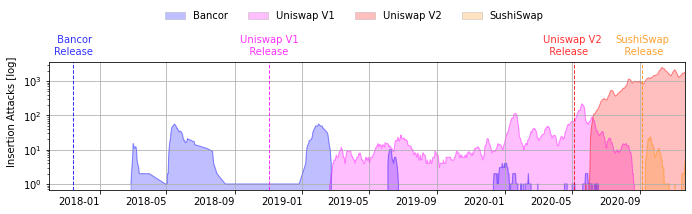

In [7]:
fig, ax = plt.subplots(figsize=(9.5, 3.5))

ax.plot(timestamps, bancor, label='Bancor', linewidth=1, color='blue', alpha=0.25)
ax.fill_between(timestamps, bancor, color='blue', alpha=0.25)

ax.plot(timestamps, uniswap_v1, label='Uniswap V1', linewidth=1, color='fuchsia', alpha=0.25)
ax.fill_between(timestamps, uniswap_v1, color='fuchsia', alpha=0.25)

ax.plot(timestamps, uniswap_v2, label='Uniswap V2', linewidth=1, color='red', alpha=0.25)
ax.fill_between(timestamps, uniswap_v2, color='red', alpha=0.25)

ax.plot(timestamps, sushiswap, label='SushiSwap', linewidth=1, color='darkorange', alpha=0.25)
ax.fill_between(timestamps, sushiswap, color='darkorange', alpha=0.25)

ax.xaxis_date()
ax.set_xlim([dt.date(2017, 10, 1), timestamps[-1]])

ax.grid(True)
ax.semilogy()

ax.axvline(x=datetime(2017, 11, 13), linestyle='dashed',linewidth=1, alpha=0.8, color='blue')
ax.text(x=datetime(2017, 10, 11), y=6000, s=' Bancor\nRelease', alpha=0.8, color='blue')

ax.axvline(x=datetime(2018, 11, 2), linestyle='dashed', linewidth=1,alpha=0.8, color='fuchsia')
ax.text(x=datetime(2018, 9, 10), y=6000, s='Uniswap V1\n   Release', alpha=0.8, color='fuchsia')

ax.axvline(x=datetime(2020, 5, 4), linestyle='dashed', linewidth=1, alpha=0.8, color='red')
ax.text(x=datetime(2020, 3, 10), y=6000, s='Uniswap V2\n  Release', alpha=0.8, color='red')

ax.axvline(x=datetime(2020, 9, 4), linestyle='dashed',linewidth=1, alpha=0.8, color='darkorange')
ax.text(x=datetime(2020, 7, 18), y=6000, s='SushiSwap\n   Release', alpha=0.8, color='darkorange')

fig.text(0.0, 0.5, 'Insertion Attacks [log]', ha='center', va='center', rotation='vertical')
fig.autofmt_xdate()

legend_elements = [
    Patch(facecolor='blue', edgecolor='gray', alpha=0.25, label=r'Bancor'),
    Patch(facecolor='fuchsia', edgecolor='gray', alpha=0.25, label=r'Uniswap V1'),
    Patch(facecolor='red', edgecolor='gray', alpha=0.25, label=r'Uniswap V2'),
    Patch(facecolor='darkorange', edgecolor='gray', alpha=0.25, label=r'SushiSwap'),
]
ax.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.48, 1.25), ncol=4, frameon=False)

fig.tight_layout()

plt.xticks(rotation=0)

plt.savefig(os.path.join(data_directory, "weekly_averaged_insertion_attacks.pdf"), dpi=1000, bbox_inches='tight')

In [8]:
all_profit = collections.OrderedDict(sorted(all_profit.items()))
timestamps = list(all_profit.keys())

sushiswap_profit = collections.OrderedDict(sorted(sushiswap_profit.items()))
sushiswap = list(sushiswap_profit.values())

sushiswap = list()
d = collections.deque(maxlen=7)
for timestamp in sushiswap_profit:
    d.append(sushiswap_profit[timestamp])
    sushiswap.append(int(np.mean(d)))

uniswap_v2_profit = collections.OrderedDict(sorted(uniswap_v2_profit.items()))
uniswap_v2 = list(uniswap_v2_profit.values())

uniswap_v2 = list()
d = collections.deque(maxlen=7)
for timestamp in uniswap_v2_profit:
    d.append(uniswap_v2_profit[timestamp])
    uniswap_v2.append(int(np.mean(d)))

uniswap_v1_profit = collections.OrderedDict(sorted(uniswap_v1_profit.items()))
uniswap_v1 = list(uniswap_v1_profit.values())

uniswap_v1 = list()
d = collections.deque(maxlen=7)
for timestamp in uniswap_v1_profit:
    d.append(uniswap_v1_profit[timestamp])
    uniswap_v1.append(int(np.mean(d)))

bancor_profit = collections.OrderedDict(sorted(bancor_profit.items()))
bancor = list(bancor_profit.values())

bancor = list()
d = collections.deque(maxlen=7)
for timestamp in bancor_profit:
    d.append(bancor_profit[timestamp])
    bancor.append(int(np.mean(d)))

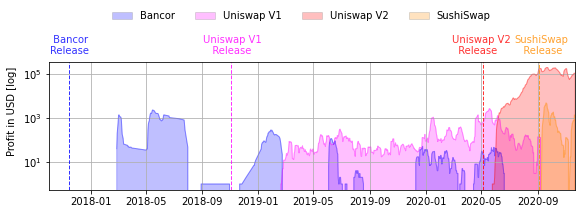

In [9]:
fig, ax = plt.subplots(figsize=(8, 3.5))

ax.plot(timestamps, bancor, label='Bancor', linewidth=1, color='blue', alpha=0.25)
ax.fill_between(timestamps, bancor, color='blue', alpha=0.25)

ax.plot(timestamps, uniswap_v1, label='Uniswap V1', linewidth=1, color='fuchsia', alpha=0.25)
ax.fill_between(timestamps, uniswap_v1, color='fuchsia', alpha=0.25)

ax.plot(timestamps, uniswap_v2, label='Uniswap V2', linewidth=1, color='red', alpha=0.25)
ax.fill_between(timestamps, uniswap_v2, color='red', alpha=0.25)

ax.plot(timestamps, sushiswap, label='SushiSwap', linewidth=1, color='darkorange', alpha=0.25)
ax.fill_between(timestamps, sushiswap, color='darkorange', alpha=0.25)

ax.xaxis_date()
ax.set_xlim([dt.date(2017, 10, 1), timestamps[-1]])

ax.grid(True)
ax.semilogy()

ax.axvline(x=datetime(2017, 11, 13), linestyle='dashed',linewidth=1, alpha=0.8, color='blue')
ax.text(x=datetime(2017, 10, 4), y=800000, s=' Bancor\nRelease', alpha=0.8, color='blue')

ax.axvline(x=datetime(2018, 11, 2), linestyle='dashed', linewidth=1,alpha=0.8, color='fuchsia')
ax.text(x=datetime(2018, 9, 2), y=800000, s='Uniswap V1\n   Release', alpha=0.8, color='fuchsia')

ax.axvline(x=datetime(2020, 5, 4), linestyle='dashed', linewidth=1, alpha=0.8, color='red')
ax.text(x=datetime(2020, 2, 28), y=800000, s='Uniswap V2\n  Release', alpha=0.8, color='red')

ax.axvline(x=datetime(2020, 9, 4), linestyle='dashed',linewidth=1, alpha=0.8, color='darkorange')
ax.text(x=datetime(2020, 7, 12), y=800000, s='SushiSwap\n   Release', alpha=0.8, color='darkorange')

fig.text(0.0, 0.5, 'Profit in USD [log]', ha='center', va='center', rotation='vertical')
fig.autofmt_xdate()

legend_elements = [
    Patch(facecolor='blue', edgecolor='gray', alpha=0.25, label=r'Bancor'),
    Patch(facecolor='fuchsia', edgecolor='gray', alpha=0.25, label=r'Uniswap V1'),
    Patch(facecolor='red', edgecolor='gray', alpha=0.25, label=r'Uniswap V2'),
    Patch(facecolor='darkorange', edgecolor='gray', alpha=0.25, label=r'SushiSwap'),
]
ax.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.48, 1.25), ncol=4, frameon=False)

fig.tight_layout()

plt.xticks(rotation=0, ha="center")

plt.savefig(os.path.join(data_directory, "weekly_averaged_insertion_profit.pdf"), dpi=1000, bbox_inches='tight')